In [5]:
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from vega_datasets import data
df = data.sf_temps()

df.set_index('date', inplace = True)

### Exercise 1):
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
df.dtypes

temp    float64
dtype: object

<AxesSubplot:title={'center':'Average Daily Temperature'}, xlabel='date'>

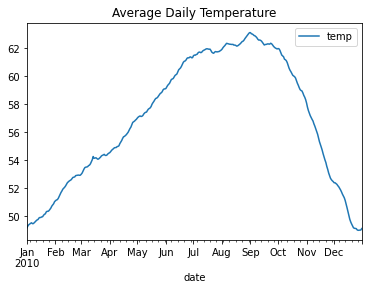

In [7]:
 df.resample('D').mean().plot(title = 'Average Daily Temperature')

### Exercise 2):
Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

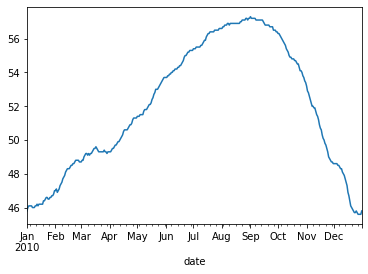

In [10]:
df.resample('D').temp.min().plot()

,temp,rolling_3,rolling_5,rolling_7
date,,,,
2010-01-01,45.8,NaN,NaN,NaN
2010-01-02,46.0,NaN,NaN,NaN
2010-01-03,46.1,45.8,NaN,NaN
2010-01-04,46.1,46.0,NaN,NaN
2010-01-05,46.1,46.1,45.8,NaN
2010-01-06,46.1,46.1,46.0,NaN
2010-01-07,46.0,46.0,46.0,45.8
2010-01-08,46.0,46.0,46.0,46.0
2010-01-09,46.0,46.0,46.0,46.0


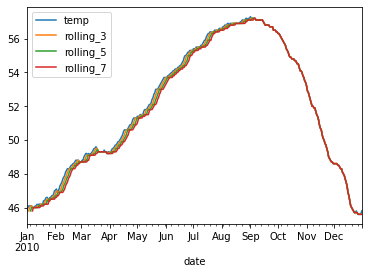

In [12]:
rolling_df = df.resample('D').min().assign(
    rolling_3=lambda df: df.temp.rolling(3).min(),
    rolling_5=lambda df: df.temp.rolling(5).min(),
    rolling_7=lambda df: df.temp.rolling(7).min(),
)
rolling_df.plot()
rolling_df.head(20)


### Exercise 3):
Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:title={'center':'Maximum Daily Temperature'}, xlabel='date'>

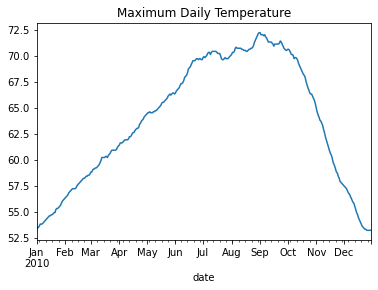

In [13]:
df.resample('D').temp.max().plot(title='Maximum Daily Temperature')

,temp,rolling_3,rolling_5,rolling_7
date,,,,
2010-01-01,53.3,NaN,NaN,NaN
2010-01-02,53.4,NaN,NaN,NaN
2010-01-03,53.5,53.5,NaN,NaN
2010-01-04,53.6,53.6,NaN,NaN
2010-01-05,53.8,53.8,53.8,NaN
2010-01-06,53.8,53.8,53.8,NaN
2010-01-07,53.8,53.8,53.8,53.8
2010-01-08,53.9,53.9,53.9,53.9
2010-01-09,54.0,54.0,54.0,54.0


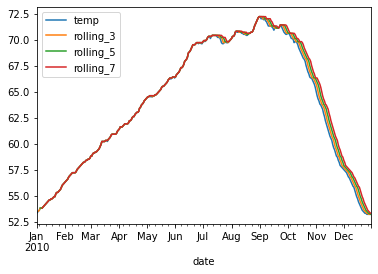

In [14]:
#trying out rolling variables for seeing successive data
rolling_max = df.resample('D').max().assign(
    rolling_3=lambda df: df.temp.rolling(3).max(),
    rolling_5=lambda df: df.temp.rolling(5).max(),
    rolling_7=lambda df: df.temp.rolling(7).max(),
)
rolling_max.plot()
rolling_max.head(20)

### Exercise 4):
Which month is the coldest, on average?

In [18]:
df['month']= df.index.strftime('%m-%b')

In [19]:
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,01-Jan
2010-01-01 01:00:00,47.4,01-Jan
2010-01-01 02:00:00,46.9,01-Jan
2010-01-01 03:00:00,46.5,01-Jan
2010-01-01 04:00:00,46.0,01-Jan


In [20]:
df.month.value_counts()

01-Jan    744
05-May    744
07-Jul    744
08-Aug    744
10-Oct    744
12-Dec    744
03-Mar    743
04-Apr    720
06-Jun    720
09-Sep    720
11-Nov    720
02-Feb    672
Name: month, dtype: int64

In [21]:
df.groupby('month').temp.mean().sort_values()

month
01-Jan    49.984140
12-Dec    50.498253
02-Feb    52.243899
03-Mar    53.956528
11-Nov    55.185139
04-Apr    55.633056
05-May    57.970968
10-Oct    60.253091
06-Jun    60.444722
07-Jul    61.765457
08-Aug    62.405376
09-Sep    62.487083
Name: temp, dtype: float64

In [15]:
monthly_temps = df.resample('M').mean()

In [22]:
#or using idxmin and idxmax to use (based on index) what high and low temp is
monthly_temps.temp.idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

In [17]:
monthly_temps

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


### Exercise 5):
Which month has the highest average temperature?

In [23]:
monthly_temps.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

### Exercise 6):
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [24]:
daily = df.resample('D').temp.agg(['min','max'])

In [25]:
daily

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [26]:
daily['temp_change'] = daily['max']-daily['min']
daily

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [28]:
daily['month'] = daily.index.strftime('%m-%b')
daily

,min,max,temp_change,month
date,,,,
2010-01-01,45.8,53.3,7.5,01-Jan
2010-01-02,46.0,53.4,7.4,01-Jan
2010-01-03,46.1,53.5,7.4,01-Jan
2010-01-04,46.1,53.6,7.5,01-Jan
2010-01-05,46.1,53.8,7.7,01-Jan
...,...,...,...,...
2010-12-27,45.6,53.2,7.6,12-Dec
2010-12-28,45.6,53.2,7.6,12-Dec
2010-12-29,45.6,53.2,7.6,12-Dec


In [29]:
daily.groupby('month').temp_change.max().sort_values().tail()

month
10-Oct    14.4
06-Jun    14.8
07-Jul    14.8
09-Sep    14.9
08-Aug    15.0
Name: temp_change, dtype: float64

In [30]:
df.resample('D').temp.agg(['min', 'mean','max']).head()

,min,mean,max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8


### Exercise 7):
Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


<AxesSubplot:xlabel='date'>

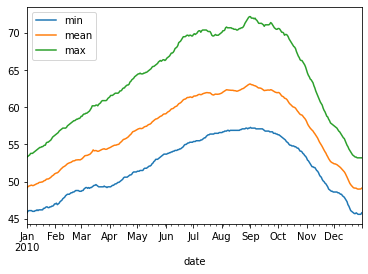

In [36]:
df.resample('D').temp.agg(['min','mean','max']).plot()

________________________________________________________________________________________________________

# Seattle Weather dataset

In [37]:
from vega_datasets import data
data.seattle_weather()
df_seattle = data.seattle_weather()
df_seattle.head()

df_seattle.set_index('date', inplace = True)
df_seattle.sort_index(inplace=True)
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [39]:
df_seattle['month']=df_seattle.index.strftime('%m-%b')

In [40]:
df_seattle['year']=df_seattle.index.year
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012


### Exercise 1):
Which year and month combination has the highest amount of precipitation?

In [41]:
df_seattle.precipitation.resample('m').sum().nlargest(n=1)

date
2015-12-31    284.5
Freq: M, Name: precipitation, dtype: float64

In [42]:
#or using sort values and tail methods
df_seattle.resample('M').precipitation.sum().sort_values().tail()

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

### Exercise 2):
Visualize the amount of monthly precipitation over time.

<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

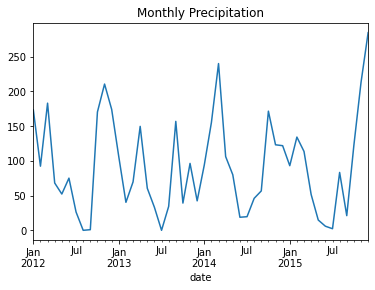

In [44]:
df_seattle.precipitation.resample('m').sum().plot(title='Monthly Precipitation')

### Exercise 3):
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:title={'center':'Biweekly Avg. Wind'}, xlabel='date'>

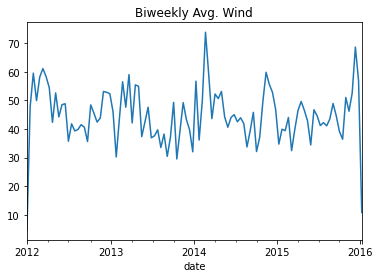

In [47]:
df_seattle.wind.resample('2w').sum().plot(title='Biweekly Avg. Wind')

### Exercise 4):
Which year-month combination is the windiest?

In [48]:
df_seattle.wind.resample('m').mean().nlargest(n=1)

date
2014-02-28    4.528571
Freq: M, Name: wind, dtype: float64

In [49]:
#or using:
df_seattle.groupby(['year','month']).sum()

precipitation  temp_max  temp_min   wind
year month                                           
2012 01-Jan          173.3     218.7      47.8  120.9
     02-Feb           92.3     269.0      92.9  113.2
     03-Mar          183.0     296.2      88.0  131.7
     04-Apr           68.1     446.2     179.8  101.2
     05-May           52.2     547.5     253.9  104.0
     06-Jun           75.1     560.8     314.4   92.5
     07-Jul           26.3     710.1     400.9   89.2
     08-Aug            0.0     801.6     434.3   87.7
     09-Sep            0.9     686.4     337.3   79.4
     10-Oct          170.3     490.7     259.8  109.5
     11-Nov          210.5     339.8     156.8   96.6
     12-Dec          174.0     224.3     102.1  118.8
2013 01-Jan          105.7     189.3      24.7   89.2
     02-Feb           40.3     265.1     121.1  101.7
     03-Mar           69.7     394.0     154.3  107.3
     04-Apr          149.6     427.3     200.9  111.4
     05-May           60.5     608.4     307.6   97.9
     06-Jun           33.1     697.6     394.9   90.1
     07-Jul            0.0     808.9     431.9   83.3
     08-Aug           34.4     809.7     479.9   78.8
     09-Sep          156.8     640.8     407.7   90.4
     10-Oct           39.2     441.1     236.8   70.5
     11-Nov           96.3     361.6     167.7   95.4
     12-Dec           42.4     217.7      48.7   84.8
2014 01-Jan           94.0     297.6     127.0  103.8
     02-Feb          155.2     229.6      73.8  126.8
     03-Mar          240.0     400.1     168.2  114.0
     04-Apr          106.1     463.8     201.9  110.9
     05-May           80.0     616.0     316.7   97.8
     06-Jun           18.8     647.7     352.7   95.7
     07-Jul           19.6     833.9     447.2   96.0
     08-Aug           46.0     817.9     461.7   76.8
     09-Sep           56.7     694.9     397.0   94.3
     10-Oct          171.5     556.8     337.4   90.4
     11-Nov          123.1     330.9     135.3  119.5
     12-Dec          121.8     314.3     142.9  110.5
2015 01-Jan           93.0     314.8     134.9   75.3
     02-Feb          134.2     350.5     170.4   86.2
     03-Mar          113.5     445.7     192.0   90.9
     04-Apr           51.6     465.1     180.9   99.4
     05-May           14.8     620.8     314.0   87.2
     06-Jun            5.9     781.9     407.3   97.4
     07-Jul            2.3     870.9     480.5   92.5
     08-Aug           83.3     808.7     455.5   97.8
     09-Sep           21.1     608.8     341.0   91.5
     10-Oct          122.4     543.7     325.5   94.1
     11-Nov          212.6     290.5     104.4  106.4
     12-Dec          284.5     259.8     118.6  134.6

In [50]:
df_seattle.groupby(['year','month']).sum().wind.idxmax()

(2015, '12-Dec')

### Exercise 5):
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [51]:
df_seattle['is_sunny']= df_seattle.weather == 'sun'

In [53]:
df_seattle.groupby(['year']).is_sunny.mean().sort_values()

year
2012    0.322404
2015    0.493151
2013    0.561644
2014    0.578082
Name: is_sunny, dtype: float64

### Exercise 6):
In which month does it rain the most?


In [55]:
df_seattle.groupby('month').precipitation.sum().sort_values().tail()

month
01-Jan    466.0
10-Oct    503.4
03-Mar    606.2
12-Dec    622.7
11-Nov    642.5
Name: precipitation, dtype: float64

### Exercise 7):
Which month has the most number of days with a non-zero amount of precipitation?


In [58]:
df_seattle['nonzero_precip'] = df_seattle.precipitation > 0
df_seattle.groupby('month').nonzero_precip.mean().sort_values().tail()

month
01-Jan    0.532258
03-Mar    0.588710
11-Nov    0.591667
02-Feb    0.646018
12-Dec    0.653226
Name: nonzero_precip, dtype: float64

_______________________________________________________________________________________________

In [59]:
df = data.flights_20k()

In [60]:
df = df.sort_values(by='date').reset_index(drop=True)

In [61]:
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Convert any negative to delays to 0

In [63]:
#clips anything lower than zero
df.delay.clip(lower=0)

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00     0
2001-01-01 07:00:00     0
2001-01-01 07:00:00     0
                       ..
2001-03-31 21:02:00    26
2001-03-31 21:05:00     0
2001-03-31 21:05:00     0
2001-03-31 21:30:00    30
2001-03-31 21:30:00     0
Name: delay, Length: 20000, dtype: int64

In [65]:
#or you can use numpy....
import numpy as np

df.delay = np.where(df.delay < 0, 0, df.delay)

In [66]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Which hour of the day has the highest avg delay?

In [67]:
df['hour']= df.index.hour

In [68]:
df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

### Does the day of the week make a difference in the delay amount?


In [69]:
df['weekday'] = df.index.strftime('%w-%a')

In [70]:
df.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,1-Mon
2001-01-01 06:20:00,0,491,BNA,MCI,6,1-Mon
2001-01-01 06:30:00,0,251,MDW,STL,6,1-Mon
2001-01-01 07:00:00,0,361,OAK,ONT,7,1-Mon
2001-01-01 07:00:00,0,303,MSY,HOU,7,1-Mon


In [72]:
df.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

### Does the month make a difference in the delay amount?

In [73]:
df['month'] = df.index.month

In [74]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64